In [1]:
library(Seurat)
library(dplyr)
library(reticulate)
library(Matrix)
library(stringr)
library(tximport)
library(readr)
library(harmony)
library(reshape)
library(ggplot2)
library(repr)
library(ggpubr)
library(UpSetR)
library(ggcorrplot)
library(ggrepel)
library(networkD3)
library(GEOquery)
library(limma)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Rcpp


Attaching package: ‘reshape’


The following object is masked from ‘package:Matrix’:

    expand


The following object is masked from ‘package:dplyr’:

    rename



Attaching package: ‘networkD3’


The following object is masked from ‘package:Seurat’:

    JS


Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following object is masked from ‘package:Matrix’:

    which


The following objects are masked from ‘package:dply



***Import combined data object***



In [28]:
setwd("/home/jovyan/data/bone_marrow/raw_data")
data<-readMM('bm_counts.mtx')

genes<-read.csv('bm_genes.csv', sep = '\t')
rownames(data)<-genes$gene_short_name

cells<-read.csv('bm_cell_names.txt', sep = '\t')
colnames(data)<-cells$X0

meta<-read.csv('bm_metadata.txt', sep = '\t', row.names = 1)

In [36]:
bm<-CreateSeuratObject(data, min.cells = 3, min.features = 200)

bm<-AddMetaData(bm, meta)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [10]:
saveRDS(bm, "bm_total.RDS")



***Fig 5D***



In [2]:
setwd("/home/jovyan/data/bone_marrow/raw_data")
bm<-readRDS("bm_total.RDS")

In [3]:
bm <- NormalizeData(bm, normalization.method = "LogNormalize", scale.factor = 10000)
bm <- FindVariableFeatures(bm, selection.method = "vst", nfeatures = 2000)
bm <- ScaleData(bm)

Centering and scaling data matrix



In [4]:
Idents(bm)<-"clusters_jan"
bm<-subset(bm, id = c("lymphoid_pre", "basophil"), invert = TRUE)

In [236]:
setwd("/home/jovyan/data/bone_marrow")
order<-read.csv('gencode_v19_gene_pos.txt', sep = '\t', header = FALSE, row.names = 1)

In [13]:
order$gene<-rownames(order)

In [15]:
df<-data.frame('p_val' = character(),
               'avg_log2FC'= character(), 
               'pct.1'= character(), 
               'pct.2'= character(), 
               'p_val_adj'= character(), 
               'cluster'= character(), 
               'gene'= character(), 
               'celltype'= character())

In [16]:
Idents(bm)<-"clusters_jan"
df<-data.frame()
for(i in unique(bm@meta.data$clusters_jan)){
    test<-subset(bm, id = i)
    Idents(test)<-"Status"
    markers<-FindAllMarkers(test, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.40)
    markers<-markers[markers$p_val_adj<0.05,]
    markers$celltype<-i
    df<-rbind(df, markers)
}

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy



In [ ]:
order$gene<-rownames(order)
df<-left_join(df, order)

In [249]:
setwd("/home/jovyan/data/bone_marrow/data")
write.csv(test, "downs_vs_healthy_DEGs.csv")

In [23]:
df<-data.frame(chromosome=levels(order$V2))

In [24]:
Idents(bm)<-"clusters_jan"
for(i in unique(bm@meta.data$clusters_jan)){
    test<-subset(bm, id = i)
    Idents(test)<-"Status"
    markers<-FindAllMarkers(test, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.40)
    markers<-markers[markers$cluster=="Downs",]
    markers<-markers[markers$p_val_adj<0.05,]
    asd<-merge(markers, order, by = "gene")
    b<-data.frame(table(asd$V2))
    df$d<-b$Freq
    names(df)[names(df) == "d"] <- i
    
}

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy

Calculating cluster Downs

Calculating cluster Healthy



In [25]:
setwd("/home/jovyan/data/bone_marrow/data")
write.csv(df, "chromosomes_5c.csv")

In [26]:
rates<-read.csv("chromosomes_5c.csv", row.names = 2)
rates$X<-NULL
types<-colnames(rates)
rates<-as.data.frame(rates)
rates<-as.data.frame(t(rates))
rates$chrM<-NULL

In [27]:
table(order$V2)


 chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr20 
 5200  2175  3125  2721  1193  2162  1999  2253  2810  1076  2863  3882  1273 
chr21 chr22  chr3  chr4  chr5  chr6  chr7  chr8  chr9  chrM  chrX  chrY 
  708  1228  2959  2468  2762  2793  2745  2304  2248    37  2291   490 

In [28]:
rates <- rates %>% mutate(chr1 = chr1 / 5200)
rates <- rates %>% mutate(chr2 = chr2 / 3882)
rates <- rates %>% mutate(chr3 = chr3 / 2959)
rates <- rates %>% mutate(chr4 = chr4 / 2468)
rates <- rates %>% mutate(chr5 = chr5 / 2762)
rates <- rates %>% mutate(chr6 = chr6 / 2793)
rates <- rates %>% mutate(chr7 = chr7 / 2745)
rates <- rates %>% mutate(chr8 = chr8 / 2304)
rates <- rates %>% mutate(chr9 = chr9 / 2248)
rates <- rates %>% mutate(chr10 = chr10 / 2175)
rates <- rates %>% mutate(chr11 = chr11 / 3125)
rates <- rates %>% mutate(chr12 = chr12 / 2721)
rates <- rates %>% mutate(chr13 = chr13 / 1193)
rates <- rates %>% mutate(chr14 = chr14 / 2162)
rates <- rates %>% mutate(chr15 = chr15 / 1999)
rates <- rates %>% mutate(chr16 = chr16 / 2253)
rates <- rates %>% mutate(chr17 = chr17 / 2810)
rates <- rates %>% mutate(chr18 = chr18 / 1076)
rates <- rates %>% mutate(chr19 = chr19 / 2863)
rates <- rates %>% mutate(chr20 = chr20 / 1273)
rates <- rates %>% mutate(chr21 = chr21 / 708)
rates <- rates %>% mutate(chr22 = chr22 / 1228)
rates <- rates %>% mutate(chrX = chrX / 2291)
rates <- rates %>% mutate(chrY = chrY / 490)
rownames(rates)<-types

In [29]:
rates$type<-rownames(rates)
df2<-melt(rates, id = c("type"))

In [30]:
options(repr.plot.width=10, repr.plot.height=10)

df2$type<-as.factor(df2$type)
df2$type <- factor(df2$type, levels = rev(c("HSC", "MEMP", 
                                            "myeloid_pre", "myeloid_DC", "Mono",
                                            "erythroid", "MK",  "neutrophil",
                                            "B_lin", 
                                      "pDC", "eosinophil", "mast_cell",
                                       "T_cell", "NK", "stroma")))


df2$variable <- factor(df2$variable, levels = c("chr1", "chr2", "chr3", "chr4",
                                              "chr5", "chr6", "chr7", "chr8",
                                              "chr9", "chr10", "chr11", "chr12", "chr13", "chr14", "chr15", "chr16", "chr17", "chr18", "chr19", 
                                              "chr20", "chr21", "chr22", "chrX", "chrY"))

Saving 6.67 x 6.67 in image



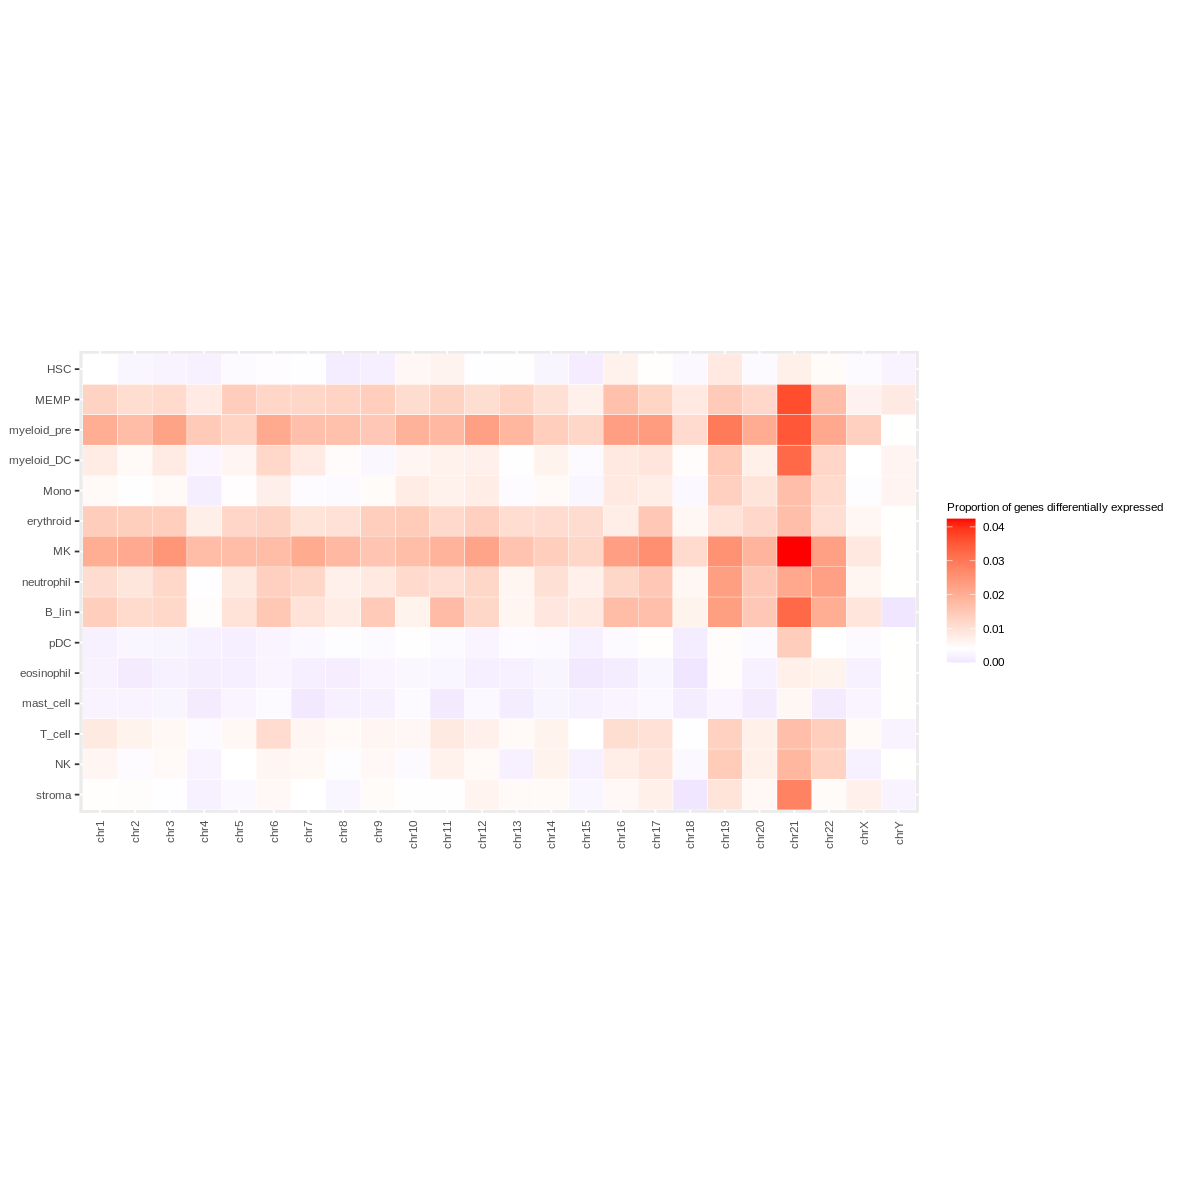

In [45]:
setwd("/home/jovyan/data/bone_marrow/figures")

ggplot(df2, aes(type, variable, fill= value)) + 
   geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0.004) + 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
coord_flip() + theme(aspect.ratio = 0.55) +
  theme(axis.title.x=element_blank(),
        axis.title.y=element_blank(),
        axis.ticks.x=element_blank(),
       axis.text=element_text(size=7),
       legend.text = element_text(size = 7), 
        legend.title = element_text(size = 7))+
labs(fill='Proportion of genes differentially expressed')

ggsave("DEGs_by_chromosome.pdf", plot = last_plot(), device = NULL, path = NULL,
  scale = 1, dpi = 300)



***Differentially expressed TFs - fig S7G***




In [2]:
setwd("/home/jovyan/data/bone_marrow/raw_data")
bm<-readRDS("bm_total.RDS")

In [4]:
setwd("/home/jovyan/data/bone_marrow/")
order<-read.csv('gencode_v19_gene_pos.txt', sep = '\t', header = FALSE, row.names = 1)
order$gene<-rownames(order)

In [6]:
TFs<-read.csv("nrg2538-s3.txt", sep = '\t')
TFs<-TFs[c("Ensembl.ID", "HGNC.symbol")]
colnames(TFs)<-c("Ensembl", "gene")

TFs<-merge(TFs, order, by = "gene")
TFs<-TFs[c("gene", "V2")]
colnames(TFs)<-c("gene", "chromosome")


In [10]:
setwd("/home/jovyan/data/bone_marrow/data")
DEGs<- read.csv("downs_vs_healthy_DEGs.csv", row.names = 1)
DEGs_21<- DEGs %>% filter(V2 == "chr21")

In [15]:
DEGs_21_TF<-DEGs_21 %>% filter(gene %in% TFs$gene)

In [30]:
test <-DEGs_21_TF %>% select(avg_log2FC, p_val_adj, gene, celltype)

In [72]:
test$log_neg_log_p_val <- log(-(log(test$p_val_adj)))

In [73]:
test$avg_log2FC<-as.numeric(test$avg_log2FC)

In [74]:
library(RColorBrewer)

Saving 6.67 x 6.67 in image



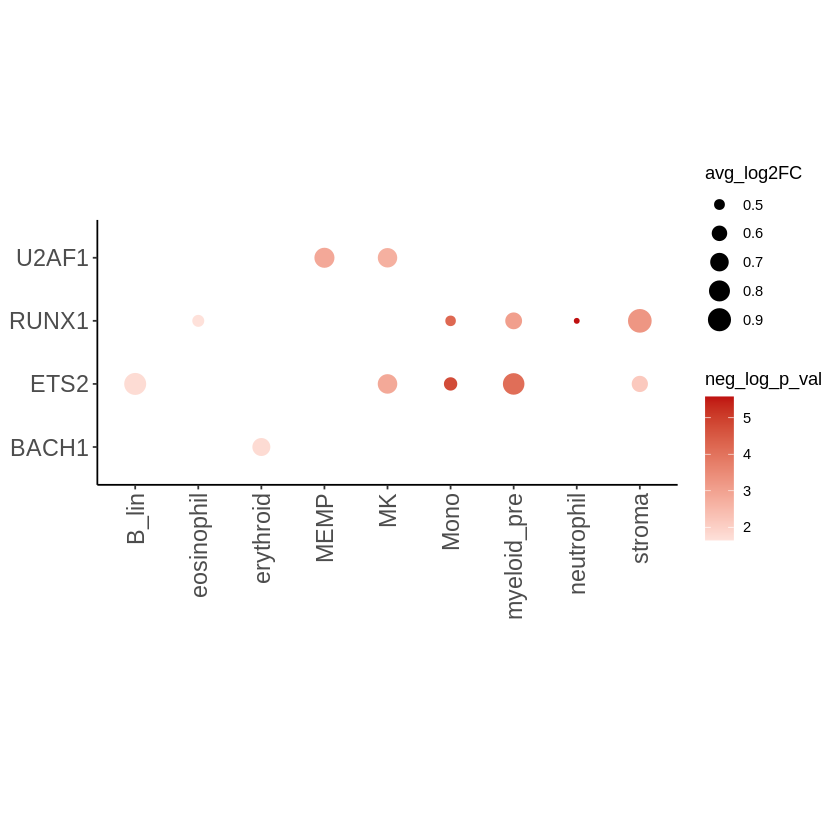

In [81]:
ggplot(test, aes(x = celltype, y = gene))+
geom_point(aes(size = avg_log2FC, colour = neg_log_p_val))+
#scale_colour_distiller(palette = "spectral")+
#scale_colour_gradientn(colours = terrain.colors(10))+
scale_colour_gradient2(low = "grey", high = "#bf1010", midpoint = 1)+
coord_equal()+

theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))+
theme(axis.title.x=element_blank(), axis.title.y=element_blank())+ 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size = 14))+
theme(axis.text.y = element_text(size = 14))

options(repr.plot.width=10, repr.plot.height=10)

setwd("/home/jovyan/data/bone_marrow/figures")

ggsave("TFs_only.pdf", plot = last_plot(), device = NULL, path = NULL,
  scale = 1, dpi = 300)

In [9]:
runx1_genes<-c("GPSM3", 	"RASGRP3", 	"LCP2", 	"LAT", 	"RIN3", 	"PIK3R5", 	"ITGA2B", 	"DOCK10", 	"EVA1B", 	"MARK2", 	"ARHGAP27", 	"FERMT3", 	"PTPN7", 	"RGS14", 	"IKBKB", 	"SLC22A15", 	"PIK3CD", 	"SH3BP2", 	"PRKACB", 	"CYTL1", 	"HCLS1", 	"CCDC9", 	"ITGAL", 	"PRICKLE1", 	"RRP12", 	"S100A9", 	"NLRC3", 	"MAPRE2", 	"KLHL6", 	"ETF1", 	"LST1", 	"C12orf75", 	"TFPI", 	"ZFC3H1", 	"FMNL1", 	"CD200R1", 	"SPNS3", 	"FCER1G", 	"MAP3K11", 	"GPR65", 	"MMRN1", 	"CCDC88B", 	"FBRSL1", 	"GBA", 	"GAB3", 	"KIF3B", 	"TLR4", 	"CSK", 	"VAV1", 	"SPI1", 	"CXCR3", 	"TLN1", 	"ITGB2", 	"PKN1", 	"NFKB1", 	"ARHGAP9", 	"NEDD4", 	"ALOX5AP", 	"SERPINA1", 	"TAGAP", 	"ACAP2", 	"NCF4", 	"TRERF1", 	"TMC8", 	"ICAM3", 	"TIE1", 	"STXBP5", 	"CCM2", 	"IL11RA", 	"SYTL3", 	"BIN3", 	"PHLDB3", 	"CTSG", 	"C1orf54", 	"PLEKHG3", 	"PDE4D", 	"TNNI2", 	"C1QC", 	"PDE1B", 	"LIMS1", 	"CTBP2", 	"PTPN6", 	"FAM102B", 	"ANXA4", 	"VGLL4", 	"KDM2A", 	"DPY19L3", 	"AAK1", 	"HK3", 	"TMEM156", 	"MIR155HG", 	"PIK3AP1", 	"NCOA7", 	"CSF2RB", 	"TBC1D10C", 	"MS4A7", 	"TRPC4AP", 	"ADGRG3", 	"LILRB5", 	"SLC9A3R1", 	"NOTCH2", 	"ANGPT2", 	"MYCT1", 	"PTPRJ", 	"RASSF5", 	"TRAF3IP3", 	"HMHA1", 	"RAE1", 	"PTPRE", 	"PLCB2", 	"MLLT10", 	"NPTN", 	"NAV3", 	"FBXO11", 	"ARFGEF1", 	"ZADH2", 	"CLEC10A", 	"FUT7", 	"PIKFYVE", 	"P2RX1", 	"RAB32", 	"BRWD3", 	"CLNK", 	"GAPT", 	"HPCAL1", 	"CLEC1B", 	"IGF1", 	"WIPF1", 	"VCPIP1", 	"E2F3", 	"CD68", 	"TBXAS1", 	"GCNT1", 	"DEPDC5", 	"JAK2", 	"IKZF2", 	"TRAPPC11", 	"PPP1R9A", 	"PRTN3", 	"C19orf25", 	"C1QTNF4", 	"B9D2", 	"TRAT1", 	"EGFL7", 	"RPS6KA3", 	"UBN2", 	"AKNA", 	"RPS17", 	"LTC4S", 	"FBXW7", 	"WDFY4", 	"ZBTB37", 	"SPX", 	"MGAT1", 	"FAM129A", 	"TBC1D1", 	"RAP1GAP2", 	"RELT", 	"TPSB2", 	"FCGR2B", 	"ELMO1", 	"UBE2Q1", 	"VPS39", 	"CTDSP1", 	"PRAM1", 	"NRBF2", 	"DGKZ", 	"EXOC1", 	"GP1BA", 	"HMBOX1", 	"SLC25A24", 	"CD63", 	"PLD4", 	"SMG7", 	"ICA1", 	"CARD6", 	"FAM91A1", 	"CCL2", 	"WAS", 	"TPSAB1", 	"CMIP", 	"DPP8", 	"STK4", 	"PPP1R21", 	"DST", 	"ZNF333", 	"FAM63B", 	"CD14", 	"FUT4", 	"HOMER3", 	"CALCRL", 	"TMEM185B", 	"APOBR", 	"MSRA", 	"DENND1B", 	"MGAT5", 	"ACBD3", 	"NLK", 	"NCF1", 	"RUNX1", 	"TUG1", 	"PACSIN2", 	"PTPRCAP", 	"ITM2C", 	"GDPD3", 	"LINC01089", 	"TRIM44", 	"DYNLL2", 	"ELF4", 	"PGRMC1", 	"S100A4", 	"MFN1", 	"TPSD1", 	"KIAA0141", 	"AP1G1", 	"SP140L", 	"CDK9", 	"TNPO3", 	"NR2C2", 	"KDM5C", 	"ARHGEF6", 	"TMEM33", 	"UBASH3B", 	"MRC1", 	"MRVI1", 	"GMIP", 	"VEZF1", 	"GTF3C1", 	"SLC35D2", 	"SLC16A3", 	"38961", 	"NLRP12", 	"TRIM41", 	"NLRP3", 	"YTHDF3", 	"PECAM1", 	"LRMP", 	"CCL4L2", 	"BRD9", 	"BANK1", 	"LINC01013", 	"RAB3C", 	"ADGRG1", 	"CYTH4", 	"CCDC93", 	"CMTM5", 	"SIGLEC14", 	"TMEM40", 	"CC2D1B", 	"NKG7", 	"HGF", 	"MSL2", 	"PTGS1", 	"WDTC1", 	"CHD7", 	"SEPP1", 	"THUMPD3-AS1", 	"STAT5B", 	"C16orf54", 	"MLC1", 	"TAGLN2", 	"PRSS57", 	"IGFBP7", 	"MACF1", 	"CLEC11A", 	"PLEK", 	"GCSAML", 	"PLAC8", 	"CCND2", 	"MANF", 	"LAIR1", 	"YPEL2", 	"ANKRD28", 	"PIK3R6", 	"CRNKL1", 	"DEF6", 	"FAR2", 	"ERMP1", 	"SNX14", 	"BICD2", 	"ZNF804A", 	"PSTPIP1", 	"ARPP21", 	"MYO1F", 	"SAMSN1", 	"CFP", 	"SLC7A7", 	"LINC01272", 	"CD79B", 	"SH3BP5L", 	"AMPD3", 	"FZR1", 	"CACNB4", 	"LLGL2", 	"CAB39", 	"ZBTB6", 	"MPZL3", 	"TRAPPC6B", 	"GPD2", 	"RGL2", 	"RAP2C", 	"DNAJC1", 	"ABHD17A", 	"EXOC3", 	"ZBTB11", 	"CSNK1G1", 	"SENP7", 	"MANBAL", 	"MTFR1L", 	"GBA2", 	"KANSL1", 	"CRK", 	"GPAA1", 	"INTS1", 	"DHX34", 	"INTS3", 	"UBE2M", 	"CCDC174", 	"ZNF274", 	"VPS53", 	"PSEN1", 	"IL2RG", 	"WDR37", 	"TCOF1", 	"NF1", 	"AP1S2", 	"ARID3B", 	"FHL3", 	"ADAM17", 	"STAB1", 	"RETN", 	"USE1", 	"C1QB", 	"FCHSD2", 	"DISP1", 	"EXTL3", 	"MAPK8IP3", 	"ZNF655", 	"INSIG2", 	"FBXO38", 	"LEPROTL1", 	"FES", 	"NRP1", 	"ARHGAP6", 	"SLC30A6", 	"PRKAR1A", 	"SH2D4B", 	"IMPA1", 	"EDEM3", 	"ZKSCAN1", 	"NSUN6", 	"ZNF518A", 	"MIDN", 	"FAM174A", 	"ARPC4", 	"EDEM1", 	"TAF1", 	"USP4", 	"PTK2B", 	"FAM207A", 	"GALNT7", 	"XPO6")






***Export subset of data with harmony corrected PCAs***



In [3]:
setwd("~/bone_marrow")
bm<-readRDS("bm.RDS")

In [32]:
Idents(bm)<-"cell.labels"
bm<-subset(bm, id = c("DC precursor", "DC1", "DC2", "DC3", "tDC", "pDC",
                     "myeloid DC progenitor", "DC precursor", "MPP myeloid 2", "MPP myeloid 1",
                     "HSC", "CMP", "GMP"))

In [33]:
bm <- NormalizeData(bm, normalization.method = "LogNormalize", scale.factor = 10000)
bm <- FindVariableFeatures(bm, selection.method = "vst", nfeatures = 2000)

In [34]:
all.genes <- rownames(bm)
bm <- ScaleData(bm, features = all.genes)

Centering and scaling data matrix



In [35]:
bm <- RunPCA(bm, features = VariableFeatures(object = bm))

PC_ 1 
Positive:  CST3, ACTB, TMSB10, ANXA2, VIM, HLA-B, CALM1, PFN1, S100A10, EMP3 
	   CD74, S100A6, SAMHD1, SH3BGRL3, S100A11, CFL1, CTSH, ANXA5, HLA-DRB5, HLA-DPA1 
	   CORO1A, FCER1G, CAPG, S100A4, CLEC10A, HLA-DRB1, HLA-C, CFP, ANXA1, HLA-DRA 
Negative:  PRSS57, EGFL7, SMIM24, RPL7, RP11-620J15.3, MPO, RPL13A, RPL26, HBG2, MYB 
	   RPS17, ITM2A, NUCB2, HBA1, RPS10, PRTN3, DLK1, RPS20, MS4A3, RPS2 
	   TRH, RPL27A, AZU1, HBA2, RPL22L1, SPINK2, NGFRAP1, CLEC11A, CD34, MYC 
PC_ 2 
Positive:  JCHAIN, IRF7, UGCG, IL3RA, LILRA4, TPM2, FAM129C, MZB1, SERPINF1, TCF4 
	   CLEC4C, CCDC50, IRF8, HERPUD1, ITM2C, IGKC, BLNK, NCF1, SIT1, ST6GALNAC4 
	   GZMB, CYTH4, SPIB, SMPD3, TNFRSF21, DERL3, APP, ALOX5AP, CCDC186, BTG2 
Negative:  TPI1, GAPDH, RNASE2, LYZ, TSPO, GSTP1, SPI1, HSPD1, H2AFZ, IGFBP7 
	   CSTA, TUBA1B, MNDA, TIMP1, FAM46A, CSF3R, RETN, HSPB1, COTL1, ALDOA 
	   HMGB2, TESC, RANBP1, NFE2, NME1, CLEC11A, HSP90AA1, IMPDH2, MPO, SERPINB1 
PC_ 3 
Positive:  FTL, TSPO, TYMP, S100A4, S

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


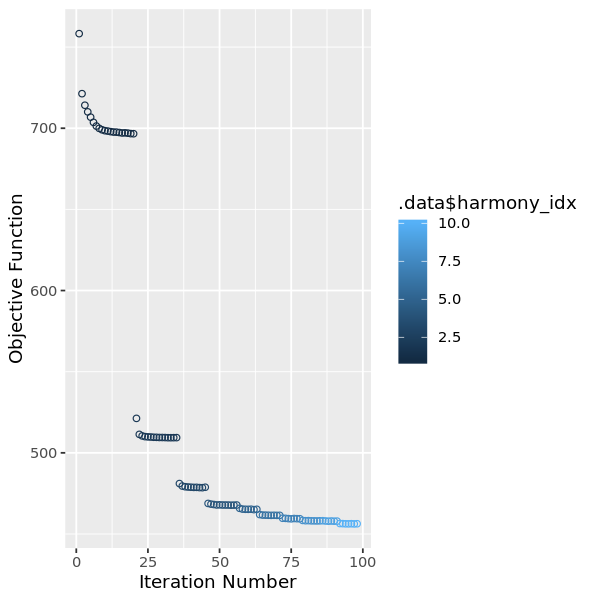

In [36]:
bm <- RunHarmony(bm, "lanes", plot_convergence = TRUE)

In [37]:
embed<-Embeddings(object = bm, reduction = "harmony")
write.csv(embed, "embed.csv")
load<-Loadings(object = bm, reduction = "harmony")
write.csv(load, "loadings.csv")

In [38]:
###Export data from Seurat

data<-GetAssayData(object = bm, slot = "counts")
writeMM(data, "dc.mtx")
write.csv(data.frame(rownames(bm)), "dc_genes.csv")
write.csv(data.frame(colnames(bm)), "dc_cells.csv")
write.csv(bm@meta.data, "dc_meta.csv")

NULL



***Volcano plot***



In [169]:
#Restart from saved DEGs
setwd("/home/jovyan/data/bone_marrow/data")
datalist<-readRDS("DEGs_for_pathways.RDS")

In [160]:
#RELA and RUNX1 target genes downloaded from Harmonizome
#note - download, copy in to Word, Find and Replace text between genes, copy in to excel and use Data to Columns to format in to column of genes

rela_genes<-c("TCEA2", 	"KLK9", 	"TSPEAR", 	"GRK5", 	"CTDSP1", 	"PTMS", 	"ITGB4", 	"UPF2", 	"STX19", 	"ASH1L", 	"GREM1", 	"CDC42SE1", 	"TBC1D17", 	"ARHGAP5", 	"SLC44A1", 	"ENO3", 	"RELB", 	"SP6", 	"MAML2", 	"GADD45B", 	"DSC2", 	"PTGES", 	"EHF", 	"CD86", 	"SOX3", 	"GPBP1", 	"FAM129A", 	"TSLP", 	"CTAGE4", 	"HOXA11", 	"RANBP10", 	"ATOH1", 	"NOD2", 	"DAP3", 	"ADGRB2", 	"ARHGAP44", 	"AMOTL1", 	"MADCAM1", 	"NR2F2", 	"E2F3", 	"PCSK2", 	"MMP9", 	"LTA", 	"FGF1", 	"TSNAXIP1", 	"REL", 	"HSD11B2", 	"ZFP36L2", 	"FUT7", 	"ATP1B1", 	"SLC11A2", 	"ABHD8", 	"CXCL11", 	"FOXJ2", 	"CCM2L", 	"TJAP1", 	"EBF1", 	"SMC6", 	"TNFSF18", 	"UBE2I", 	"HIVEP1", 	"ABI3", 	"ITPKC", 	"FLOT1", 	"RPS19", 	"FGF12", 	"TUBGCP4", 	"KCNN3", 	"MED1", 	"RSF1", 	"IRF1", 	"GRIN2D", 	"SMPD3", 	"GNG4", 	"ZIC4", 	"KCNT2", 	"VCAM1", 	"ARHGAP8", 	"CALCOCO1", 	"MAPK6", 	"PLXNB1", 	"NLK", 	"SUCO", 	"BAZ2B", 	"SUN2", 	"IL27", 	"ARHGEF2", 	"CXCL9", 	"CYLD", 	"SIN3A", 	"ALG6", 	"VSX2", 	"SLAMF8", 	"GPHN", 	"SLC12A2", 	"IGDCC3", 	"TP53", 	"MSN", 	"ZBTB9", 	"PCDH12", 	"CTDSPL2", 	"KCNH3", 	"VEZF1", 	"UACA", 	"ETV6", 	"SALL1", 	"TRPC4", 	"BCKDK", 	"ICAM1", 	"CYP26A1", 	"EGF", 	"POU2F3", 	"RPS6KA4", 	"ACAN", 	"STON2", 	"NFAT5", 	"RASGRP4", 	"CDK6", 	"TIFA", 	"RAP2C", 	"AGPAT1", 	"WRN", 	"RASSF2", 	"IL13", 	"NFKBID", 	"CDC14A", 	"RRAS", 	"MAP3K8", 	"AAMDC", 	"STC2", 	"CSF1R", 	"IL23A", 	"MIR17HG", 	"ZBTB11", 	"EIF4G1", 	"SIRT2", 	"RFX5", 	"PURG", 	"CASKIN2", 	"HSD3B7", 	"MITF", 	"IL1RAPL1", 	"MOB3C", 	"TFE3", 	"CD70", 	"CYP2D6", 	"BMF", 	"PFN1", 	"CACNG3", 	"CREB1", 	"PRDM12", 	"HSP90B1", 	"RNF43", 	"EIF4A2", 	"CCDC107", 	"CD83", 	"PPP1R13B", 	"YWHAQ", 	"CHD4", 	"GATA4", 	"CUEDC1", 	"G3BP1", 	"BIRC3", 	"EDN2", 	"PNKD", 	"ADCK4", 	"FAM43B", 	"JARID2", 	"ZBTB5", 	"CLCN2", 	"TRAF4", 	"SDC4", 	"MAG", 	"HCST", 	"CD40", 	"AP1S2", 	"ZNF232", 	"MLLT11", 	"CD69", 	"TLX3", 	"TNFSF15", 	"SOBP", 	"CXCL16", 	"SEC63", 	"PTHLH", 	"ZDHHC8", 	"GABRB1", 	"BLCAP", 	"APPL1", 	"CLCN1", 	"RND1", 	"CSF2RB", 	"ZMYND15", 	"SAMSN1", 	"SOX5", 	"PRX", 	"SIX4", 	"CXCL10", 	"UBD", 	"FBXL12", 	"TAL1", 	"KRT36", 	"XKR8", 	"NXPH4", 	"ASCL3", 	"INO80D", 	"AKT1S1", 	"ARPC2", 	"BDNF", 	"SESN2", 	"IL1RN", 	"GNGT2", 	"KY", 	"DCLK1", 	"TNIP1", 	"DOCK4", 	"IL17C", 	"C16ORF47", 	"KAT7", 	"TUT1", 	"WNT10A", 	"NFKBIB", 	"NOL4", 	"NTN1", 	"LIX1L", 	"GGNBP2", 	"CFAP69", 	"CXCR5", 	"SHOX2", 	"TNFRSF9", 	"RBMS1", 	"KRT23", 	"GNAO1", 	"CYB5A", 	"HTR3B", 	"UBE4B", 	"TIAL1", 	"BMP2K", 	"CCL5", 	"TNF", 	"FLRT1", 	"GEN1", 	"WRAP53", 	"COL11A2", 	"SMOC1", 	"CXORF21", 	"TATDN1", 	"ILK", 	"TAZ", 	"NUFIP2", 	"JAK3", 	"BCL6B", 	"PARP8", 	"SLC16A6", 	"CLOCK", 	"SEC14L2", 	"ACTN3", 	"SIX5", 	"LRCH1", 	"IL1A", 	"HNRNPR", 	"LTB", 	"IER3", 	"BNC2", 	"SPTB", 	"PLAU", 	"CLDN5", 	"CBX2", 	"ANKFN1", 	"EIF5A", 	"COL16A1", 	"TSEN54", 	"PCDH10", 	"TNFRSF1B", 	"NIPBL", 	"OPCML", 	"S1PR2", 	"BCL3", 	"PAN2", 	"ZEB1", 	"TRIM47", 	"RRP8", 	"GDPD5", 	"GNB1", 	"STX4", 	"KRTAP13-1", 	"TLX1", 	"BFSP1", 	"IL4I1", 	"C19ORF68", 	"YY1AP1", 	"MIA", 	"SH2B3", 	"CXCL6", 	"SLC6A12", 	"TRIB2", 	"MAP4K2", 	"UBE2D3", 	"MSC", 	"C1QL1", 	"RIN2", 	"CXCL2", 	"IFNB1", 	"STAT6", 	"CXCL5", 	"TP63", 	"MLLT6", 	"KCNS3", 	"FOXS1", 	"FGF17", 	"NDUFB9", 	"ERN1", 	"NFKB2", 	"IER5", 	"MAP3K11", 	"DDR1", 	"KCNN2", 	"ZSCAN29", 	"CTGF", 	"HOXB9", 	"IL6ST", 	"ORAI1", 	"RALGDS", 	"UBE2H", 	"NFKBIA", 	"HCFC1", 	"FTHL17", 	"ACTN1", 	"CPD", 	"ELMSAN1", 	"IL2RA", 	"EBI3", 	"SOX10", 	"WNT4", 	"WNT10B", 	"LAMA1", 	"GPM6A", 	"MSX1", 	"YWHAZ", 	"PCBP4", 	"IL27RA", 	"KANSL1L", 	"RIMS2", 	"LIG1")

runx1_genes <- c("LUC7L", 	"REM2", 	"CADM1", 	"SUPT4H1", 	"GRHL3", 	"GPD1", 	"LTBP3", 	"RPP25L", 	"SGIP1", 	"ATP2A2", 	"POLG2", 	"PPP1R14C", 	"CELF1", 	"PHF21A", 	"TSSK2", 	"IL17A", 	"LINC00314", 	"EREG", 	"MYBPC2", 	"CPA2", 	"MMP13", 	"MTMR3", 	"PPP1R12C", 	"SLC37A4", 	"PCSK5", 	"CHRNA10", 	"CYR61", 	"RABGAP1L", 	"SLC15A3", 	"IL13", 	"TNFSF4", 	"IL17RE", 	"ARHGAP8", 	"MMP14", 	"HPCAL1", 	"DGKA", 	"SH3BP5L", 	"TACC2", 	"SNTB2", 	"MIR22HG", 	"BOC", 	"MRPS31", 	"HOXA9", 	"ACSL5", 	"FRMD4A", 	"PAFAH1B1", 	"LCOR", 	"ZNF407", 	"CKMT1A", 	"RNF43", 	"NAV3", 	"OTOGL", 	"TBL1X", 	"LMO2", 	"PDZD2", 	"RTN4RL1", 	"COL4A1", 	"STAU1", 	"EIF5A", 	"TMEM133", 	"SCN3B", 	"RGS14", 	"PCF11", 	"ITGA10", 	"CD69", 	"RILPL1", 	"EIF2B3", 	"STRC", 	"PURG", 	"PTPN22", 	"ERG", 	"C11ORF31", 	"PCDHA1", 	"TP63", 	"NOL4L", 	"SCN8A", 	"COL9A2", 	"PDZK1", 	"SLITRK1", 	"STON1-GTF2A1L", 	"PCED1B", 	"ATP6V0A1", 	"WAS", 	"NHLRC2", 	"LINS", 	"RNF207", 	"WNT7B", 	"MPO", 	"KCTD4", 	"ADAM28", 	"GRIN2D", 	"NDUFA9", 	"RGS1", 	"UBL3", 	"HDGF", 	"GPR50", 	"HMHA1", 	"NDUFA3", 	"HOXB6", 	"TSPAN9", 	"BMP7", 	"FGFR1", 	"ZEB2", 	"SLC6A9", 	"CCDC102A", 	"DNAJC14", 	"PRUNE", 	"SP6", 	"FAM63A", 	"NAPSA", 	"C16ORF47", 	"MADD", 	"DMP1", 	"MYRF", 	"VIM", 	"XCL1", 	"UBALD2", 	"PLEKHA6", 	"CFP", 	"AZI2", 	"TWF1", 	"PPARG", 	"SWT1", 	"OSCAR", 	"LINC00310", 	"MPL", 	"LUZP1", 	"PTK2B", 	"NUTF2", 	"MYOD1", 	"KPNB1", 	"SPIB", 	"PI15", 	"KRTAP6-3", 	"CSF2", 	"CRTC2", 	"UBE2R2", 	"SCEL", 	"RAB34", 	"CD28", 	"C10ORF11", 	"SCAI", 	"MAP1LC3A", 	"RNF40", 	"CEMIP", 	"GPX1", 	"CORO1C", 	"ADAMTS8", 	"HIVEP3", 	"JMJD1C", 	"KRT74", 	"ARHGEF2", 	"FGD4", 	"ATP5A1", 	"GPBP1L1", 	"GALNT12", 	"IL3", 	"ELAVL2", 	"TLN1", 	"BLOC1S1", 	"ATF7IP", 	"TPM1", 	"SLA", 	"SIRT1", 	"C4ORF26", 	"PAX6", 	"CITED1", 	"DOK2", 	"RPP21", 	"AP1G2", 	"CAV1", 	"CCR1", 	"HP1BP3", 	"GSE1", 	"EPB41L3", 	"GRAP2", 	"DACT1", 	"MIR17HG", 	"INPPL1", 	"SNX1", 	"C14ORF119", 	"C11ORF49", 	"GFI1", 	"FOXD2", 	"TCF12", 	"APLNR", 	"HSP90B1", 	"HOXC6", 	"XCL2", 	"SLC43A2", 	"ANXA8", 	"SPDEF", 	"CFH", 	"GPATCH2", 	"IL17B", 	"DIABLO", 	"ENTPD1", 	"CNTD1", 	"CLDND1", 	"NLRP3", 	"KIF1B", 	"PIK3R1", 	"PITPNC1", 	"SLA2", 	"DGKZ", 	"CCL4", 	"ABCD4", 	"SOST", 	"MKLN1", 	"PPP2R3A", 	"DYNLL1", 	"RYBP", 	"PIGV", 	"HOXB4", 	"RIN1", 	"TLX2", 	"HEMGN", 	"DNM3", 	"PSMA1", 	"CTSK", 	"NOL9", 	"NSUN4", 	"PRSS35", 	"SLITRK5", 	"TSPAN13", 	"FGF4", 	"CKMT1B", 	"PER1", 	"CNNM4", 	"RAB30", 	"RGMA", 	"EIF3J", 	"WISP2", 	"C11ORF30", 	"MOAP1", 	"SHOX2", 	"HAPLN3", 	"POF1B", 	"POU2F1", 	"TNNT2", 	"NUCB2", 	"PCSK4", 	"CALCOCO1", 	"MAP3K11", 	"SLC31A2", 	"RUNX2", 	"CD101", 	"BCAR3", 	"FOXN3", 	"TRPV2", 	"SPRYD3", 	"TGM4", 	"AMD1", 	"CAP1", 	"MSRA", 	"FLT1", 	"ZBTB8A", 	"TMEM109", 	"RASGEF1A", 	"WBP1", 	"LCK", 	"EDC4", 	"MKL1", 	"BMPR1B", 	"PAPPA", 	"KCNN4", 	"INTS3", 	"TBK1", 	"KRT73", 	"GABRA6", 	"TSC22D3", 	"THBS3", 	"CCNT2", 	"EMP1", 	"FDCSP", 	"REL", 	"HHIPL1", 	"ADAMTS4", 	"CRY1", 	"NGB", 	"EGR2", 	"GATA4", 	"PAX1", 	"PXN", 	"COL4A2", 	"TRIB1", 	"SOX5", 	"CYP26A1", 	"CTNNB1", 	"ZBTB25", 	"WHSC1L1", 	"NRAS", 	"HHIP", 	"SCRN1", 	"CPNE1", 	"CBL", 	"IL23A", 	"GPR15", 	"ATN1", 	"PROKR1", 	"PTPN7", 	"LRP5", 	"PROK2", 	"AP1S2", 	"RBBP6", 	"FLI1", 	"FOXF2", 	"TMEM179", 	"YBX2", 	"ITGB7", 	"C1QTNF6", 	"MST1", 	"PDE3B", 	"VRK1", 	"EDARADD", 	"DUSP1", 	"PCYT2", 	"LTBP1", 	"BTG4", 	"PDZRN4", 	"HOXB1", 	"SULF1", 	"IFNG", 	"GTF2A1", 	"MTMR11", 	"IL18RAP", 	"RGS18", 	"CREM", 	"TSPAN32", 	"NEK6", 	"LIFR", 	"GDPD2", 	"ACVR2A", 	"RAMP2", 	"GZMB", 	"SLC37A2", 	"RASSF2", 	"MTX1", 	"TRPM8", 	"C11ORF88", 	"DNHD1", 	"NOTCH2", 	"NFRKB", 	"GPR155", 	"HOXB3", 	"DYRK1B", 	"RNF220", 	"MEIS2", 	"FAM84A", 	"PDGFC", 	"CDC37L1", 	"LY9", 	"MKRN3", 	"MSMB", 	"CD6", 	"GRASP", 	"ARF3", 	"BATF", 	"NRXN3", 	"CCDC91", 	"TMEM99", 	"NSMCE1", 	"RNF19B", 	"CTAGE5", 	"PTPRS", 	"NKX2-1", 	"DAB2IP", 	"ASCL4", 	"SASH3", 	"CYTIP", 	"ID3", 	"SUPT16H", 	"B3GNT5", 	"STON1", 	"DAB2", 	"CLDN10", 	"EVI2A", 	"PHF6", 	"WWC2-AS2", 	"IL17F", 	"ARHGAP21", 	"WDR81", 	"ATP6V0B", 	"DKK1", 	"ABHD8", 	"SREBF2", 	"FCER1G", 	"SLC26A7", 	"SEMA4A", 	"FAM129C", 	"SCN2B", 	"SLC2A3", 	"GRK5", 	"PCGF6", 	"TSPAN17", 	"NRXN1", 	"ADD1", 	"WNK4", 	"BNC2", 	"ZFHX3", 	"PBK", 	"RASAL2", 	"RAB5B", 	"LIMK2", 	"DUSP2", 	"ARHGAP12", 	"LMO3", 	"IL7R", 	"TAGAP", 	"MTMR4", 	"APOBR", 	"HEY1", 	"TULP4", 	"MRPL42", 	"GPR171", 	"TBX5", 	"PGF", 	"LIF", 	"HLX", 	"OLIG3", 	"C11ORF42", 	"PTCH1", 	"MND1", 	"C17ORF70", 	"BGLAP", 	"MATN1", 	"HOXB5", 	"PDE6H", 	"PRKACA", 	"AKT2", 	"TLL2", 	"GPR137B", 	"C1ORF198", 	"ARMCX1", 	"ZMYND8", 	"TBPL1", 	"CYP17A1", 	"SLC44A4", 	"BMF", 	"TMEM86A", 	"WNT8B", 	"SDF2L1", 	"LUC7L3", 	"BATF3", 	"SLC36A2", 	"TACSTD2", 	"TMEM136", 	"FOXP3", 	"DDX23", 	"TMEM62", 	"HOXC4", 	"PRR5L", 	"DNASE2B", 	"TMEM117", 	"FGD1", 	"DLX5", 	"CDYL", 	"MEOX2", 	"TRMT1L", 	"ETF1", 	"C15ORF53", 	"RBL1", 	"RHOG", 	"CNIH3", 	"CXCR5", 	"ANKRD1", 	"MDGA2", 	"MAFG", 	"BLOC1S2", 	"PDSS2", 	"PLXNC1", 	"BCL6", 	"PDLIM3", 	"ZBTB18", 	"ASB7", 	"RCC2", 	"SLC12A6", 	"RCOR2", 	"ZIC4", 	"HOXD10", 	"CTHRC1", 	"AKAP3", 	"MMP9", 	"TMEM151A", 	"OTP", 	"CRTAC1", 	"TCF7", 	"AGPAT4", 	"FAM13C", 	"SRSF2", 	"CHAD", 	"JDP2", 	"H2AFY", 	"EYA1", 	"PBX1", 	"CTNNA3", 	"CSMD3", 	"CALR", 	"PRRG4", 	"RAB39A", 	"CALHM3", 	"KCTD15", 	"SLC16A6", 	"AGO1", 	"MR1", 	"S100A9", 	"CREB5", 	"RPA3", 	"DAB1", 	"CFAP20", 	"SPINK6", 	"ENTPD3", 	"WIBG", 	"ELAVL3", 	"RAG1", 	"SMG7", 	"PACS1", 	"TNFSF13", 	"COMMD5", 	"SRSF4", 	"NOTCH2NL", 	"KCNJ1", 	"ACIN1", 	"CYGB", 	"ARHGAP32", 	"COA3", 	"CCL2", 	"HINFP", 	"DENND2D", 	"HIPK1", 	"PICALM", 	"ANK3", 	"RDH5", 	"FAIM2", 	"STAT2")

In [ ]:
#choose genes to highlight

highlight_genes<-rela_genes

In [285]:
for(i in 1:length(unique(names(datalist)))){
    #subset data
    markers<-datalist[[i]]
    markers$gene<-rownames(markers)
    
    #get a list of genes that are both RUNX1 targets and avg_log2FC > 0.4 and p_val_adj<0.05
    downs_genes<-subset(markers, avg_log2FC > 0)
    downs_genes<-subset(downs_genes, p_val_adj<0.05 & avg_log2FC>0.4)  
    gene_list<- subset(downs_genes, gene %in% highlight_genes)
    genes_to_plot<- gene_list$gene
    
    #make a new column called threshold that will be used for colouring
    markers$threshold <- ifelse(abs(markers$avg_log2FC)<0.4 | markers$p_val_adj>0.05, "C_non_significant", "D_significant")
    markers$threshold[markers$gene %in% genes_to_plot] <- "A_RUNX1_target"
    
    #add another column called colour that will be used to colour points based on the threshold column
    markers$colour<-markers$threshold
    levels(markers$colour) <- c(levels(markers$colour), c("#ae0000", '#999999', '#0072B2')) 
    markers$colour[markers$colour == "D_significant"]<-'#0072B2'
    markers$colour[markers$colour == "A_RUNX1_target"]<-"#ae0000"
    markers$colour[markers$colour == "C_non_significant"]<-"#999999"
    
    markers$colour<-as.factor(markers$colour)
    
    #to ensure red points are drawn last need to split data frame
    data1<-filter(markers, threshold %in% c("D_significant", "D_significant"))
    data2<-filter(markers, threshold %in% c("A_RUNX1_target"))

options(repr.plot.width=7, repr.plot.height=7)

    ggplot() +
        #plot non-significant points first
        geom_point(data = data1, aes(x=avg_log2FC, y=-log10(p_val_adj)), colour = data1$colour, size = 7)+
        geom_point(data = data2, aes(x=avg_log2FC, y=-log10(p_val_adj)), colour = data2$colour, size = 7)+
        geom_text_repel(data = subset(markers, threshold == 'A_RUNX1_target'), aes(x=avg_log2FC, y=-log10(p_val_adj), label = gene), size = 5, point.padding = 1, box.padding = 0.5) +
        geom_vline(xintercept = -0.4, linetype = "dashed", color = "red", size = 0.5)+
        geom_vline(xintercept = 0.4, linetype = "dashed", color = "red", size = 0.5)+
        geom_hline(yintercept = 1.41, linetype = "dashed", color = "red", size = 0.5)+
        theme(panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(), 
          panel.background = element_blank(),
          axis.line = element_line(colour = "black"))
    
    setwd("/home/jovyan/data/bone_marrow/figures")
    ggsave(paste0(unique(datalist[[i]]$cluster), "_plot.pdf"), plot = last_plot(), device = NULL, path = NULL,width = 7, height = 7, scale = 1) 
    
    }



***Sankey key plots - figure 5G***



In [235]:
links <- data.frame(
source=c("Myeloid_DC_GRN", "Neut_GRN",
         "Mono_TNF", "NK_TNF", "Neut_TNF", "Myeloid_DC_TNF",
         "B_LTA",
         "Neut_TNFSF13", "Myeloid_DC_TNFSF13", "Mono_TNFSF13",
         "B_LTA",
         "Neut_TNFSF13", "Myeloid_DC_TNFSF13", "Mono_TNFSF13",
         
         "Stroma_DLK1", "Myeloid_pro_DLK1"
         ),
target=c("TNFRSF1A", "TNFRSF1A",
         "TNFRSF1A", "TNFRSF1A","TNFRSF1A", "TNFRSF1A",
         "TNFRSF1A",
         "TNFRSF1A", "TNFRSF1A","TNFRSF1A",
         "TNFRSF14",
         "TNFRSF14", "TNFRSF14", "TNFRSF14",
         "NOTCH1", "NOTCH1"
         ), 
value=c(46, 53,
        43,78,51,78,
        30,
        48,40,33,
        30,
        48,40,33,
        133,33))


links$IDsource<-c(0,1,
                  2,3,4,5,
                  6,
                  7,8,9,
                  6,
                  7,8,9,
                  10,11)

links$IDtarget<-c(12,12,
                  12,12,12,12,
                  12,
                  12,12,12,
                  13,
                  13,13,13,
                  14,14)



nodes <- data.frame(
  name=c(as.character(links$source), 
  as.character(links$target)) %>% unique()
)

links$IDsource<-as.numeric(links$IDsource)
links$IDtarget<-as.numeric(links$IDtarget)

my_color <- 'd3.scaleOrdinal() 
.domain(["Myeloid_DC_GRN", "Neut_GRN",
"Mono_TNF", "NK_TNF", "Neut_TNF", "Myeloid_DC_TNF", "B_LTA",
"Neut_TNFSF13", "Myeloid_DC_TNFSF13", "Mono_TNFSF13", "Stroma_DLK1",  "Myeloid_pro_DLK1",
"TNFRSF1A", "TNFRSF14", "NOTCH1",
"type_a", "type_b", "type_c"]) 
.range(["#f9c2b0", "#f7b29e", 
"#f9c2b0", "#f08268", "#f7b29e", "#f08268",
"#fad1c4",
"#f7b29e", "#f9c2b0", "#fad1c4",
"#e52021", "#fad1c4",
"454c9b", "c5b6da", "786aae",
"#75a55e", "#7fccbe", "#cccc7a"])'


links$group <- as.factor(c("type_a","type_a","type_a",
                           "type_a","type_a","type_a",
                           "type_a","type_a","type_a","type_a",
            
                           "type_b","type_b","type_b", "type_b",
                           "type_c", "type_c"))

nodes$group <- as.factor(c("my_unique_group"))

p<-sankeyNetwork(Links = links, Nodes = nodes,
              Source = "IDsource", Target = "IDtarget",
              Value = "value", NodeID = "name", 
             sinksRight=FALSE, colourScale=my_color, LinkGroup="group"
             )

p


###repeat without labelling

nodes$name<-""

sankeyNetwork(Links = links, Nodes = nodes,
              Source = "IDsource", Target = "IDtarget",
              Value = "value", NodeID = "name", 
             sinksRight=FALSE, colourScale=my_color, LinkGroup="group",
             fontSize = 0
             )

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)



***Export data for cellphoneDB***



In [2]:
setwd("/home/jovyan/data/bone_marrow/raw_data")
bm<-readRDS("bm_total.RDS")

In [281]:
Idents(bm)<-"Status"
healthy<-subset(bm, id = "Healthy")
downs<-subset(bm, id = "Downs")

In [282]:
healthy = subset(healthy, cells = sample(Cells(healthy), 16672))

In [283]:
full<-merge(downs, y = healthy)

In [262]:
Idents(full)<-"clusters_jan"
export<-subset(full, id = c("MEMP", "myeloid_pre", "myeloid_DC", "MK", "neutrophil"))

In [264]:
setwd("/home/jovyan/data/bone_marrow/cellphoneDB")

count_raw <- GetAssayData(object = export, slot = "counts")
count_norm <- apply(count_raw, 2, function(x) (x/sum(x))*10000)
write.table(count_norm, 'cellphonedb_count.txt', sep='\t', quote=F, row.names=F)
                    
# generating meta file
meta_data <- cbind(rownames(export@meta.data), export@meta.data[,'clusters_jan', drop=F])   #####  cluster is the user’s specific cluster column
write.table(meta_data, 'cellphonedb_meta.txt', sep='\t', quote=F, row.names=F)

In [266]:
write.table(count_norm, 'cellphonedb_count.txt', sep='\t', quote=F)



***Calculate enrichment of Hallmark signatures - figure 5F***



In [20]:
makeGeneList <- function(gl){	
	require(dplyr)
	y <- grepl('^RPS|^RPL|^MRPL|^MRPS|^MT-', gl$gene) 
	gl <- gl[!y, ]
	gl <- gl %>% dplyr::select(gene, avg_logFC, p_val)
	gl$neglog10pval <- -log10(gl$p_val)
	rank <- unlist(gl$neglog10pval*sign(gl$avg_logFC))
	rank[rank == Inf] = 300
	rank[rank == -Inf] = -300
	names(rank) <- gl$gene
	rank <- rev(sort(rank))
	gl <- rank
}

parse_gmt <- function (file, header = TRUE, sep = "\t", ...) {
    n = max(count.fields(file, sep = sep), na.rm = TRUE)
    x = readLines(file)
    .splitvar = function(x, sep, n) {
        var = unlist(strsplit(x, split = sep))
        length(var) = n
        return(var)
    }
    x = do.call(cbind, lapply(x, .splitvar, sep = sep, n = n))
    x = apply(x, 1, paste, collapse = sep)
    out = read.csv(text = x, sep = sep, header = header, ...)
    return(out)
}

In [23]:
plotGSEA_Hallmark <- function(gsea, group_ref = NULL, cols = NULL, newlabels = NULL) {
    require(ggplot2)
    gsea$NES[which(is.na(gsea$NES))] <- 0
    gsea$pval[which(is.na(gsea$pval))] <- 1
    gsea$padj[which(is.na(gsea$padj))] <- 1
    gsea$ranking[which(is.na(gsea$ranking))] <- 0
	gsea <- gsea[order(gsea$ranking),]		
	gsea_spl <- split(gsea, gsea$group)
	if(!is.null(group_ref)){
		gsea_spl[[group_ref]] <- gsea_spl[[group_ref]][order(gsea_spl[[group_ref]]$ranking),]
		gsea_spl[[group_ref]]$ranking <- gsea_spl[[group_ref]]$ranking*999
	} else {
		gsea_spl[[2]] <- gsea_spl[[2]]$ranking*999
	}
	names(gsea_spl) <- NULL

	gsea <- do.call(rbind, gsea_spl)
	gsea <- gsea[order(gsea$ranking), ]
	gsea$pathway <- gsub("HALLMARK_|", "", gsea$pathway)
	gsea$group[which(gsea$pval >= 0.05 & gsea$padj >= 0.25)] <- 'NotSig'
	gsea$group[which(gsea$pval < 0.05 & gsea$padj >= 0.25)] <- 'NotSig'
	gsea$group[which(gsea$pval >= 0.05)] <- 'NotSig'
	gsea$group <- factor(gsea$group, levels = c('NotSig', 'MEMP', 'MK', 
                                                'myeloid_pre', 'myeloid_DC', 'HSC', 'neutrophil', 'erythroid'))

	x_lim_min <- abs(ceiling(min(-log10(gsea$padj))))
	x_lim_max <- abs(ceiling(max(-log10(gsea$padj))))

	if(x_lim_min > x_lim_max){
		xval1 <- x_lim_min * -1
		xval2 <- x_lim_min
	} else {
		xval1 <- x_lim_max * -1
		xval2 <- x_lim_max
	}

	if(!is.null(cols)){
		gg_color_hue <- function(n) {
			hues = seq(15, 375, length = n + 1)
			hcl(h = hues, l = 65, c = 100)[1:n]
		}
		cols. = gg_color_hue(dplyr::n_distinct(gsea$group, na.rm = TRUE))
	} else {
		cols. = cols
	}
    
    gsea$colour<-gsea$group
    levels(gsea$colour) <- c(levels(gsea$colour), '#fd8d3c', '#e31a1c', '#800026', '#252525', 'green')
    gsea$colour[gsea$colour == "HSC"]<-'#fd8d3c'
    gsea$colour[gsea$colour == "MEMP"]<-'#e31a1c'
    gsea$colour[gsea$colour == "MK"]<-'#800026'
    gsea$colour[gsea$colour == "erythroid"]<-'#252525'
    gsea$colour[gsea$colour == "neutrophil"]<-'green'
    
	g <- ggplot(gsea, aes(x = -log10(padj)*sign(NES), y = reorder(pathway, ranking), col = group, size = NES)) + 
		geom_point() + 
		labs(x = expression(paste("Signed", " -log" ["10"], "adjusted pval")), y = "Hallmarks") +
		theme_bw() +
		geom_vline(xintercept = 0) +
		geom_vline(xintercept = -log10(0.25)) +
		geom_vline(xintercept = -log10(0.25)*-1) +
		xlim(xval1, xval2) +
		scale_radius(range = c(0,4)) +
		theme(panel.grid.major = element_blank(), 
			panel.grid.minor = element_blank(), 
			panel.background = element_blank(), 
			axis.line = element_blank(), 
			axis.ticks = element_blank())+
	scale_color_manual(values=c('lightgrey', '#fed976', '#fd8d3c', '#e31a1c', '#800026', '#252525', 'green'))
	g$data <- g$data[order(g$data$group, na.last = TRUE), ]
	return(g)
}

In [2]:
##Import data
setwd("/home/jovyan/data/bone_marrow/raw_data")
bm<-readRDS("bm_total.RDS")


In [3]:
Idents(bm)<-"clusters_jan"
bm<-subset(bm, id = c("lymphoid_pre", "basophil"), invert = TRUE)

In [4]:
##Calculate DEGs for each cluster

datalist<-list()
clusterlist<-list()

Idents(bm)<-"clusters_jan"
for(i in unique(bm@meta.data$clusters_jan)){
    test<-subset(bm, id = i)
    Idents(test)<-"Status"
    markers<-FindMarkers(test, ident.1 = "Downs", idents.2 = "Healthy", only.pos = FALSE, logfc.threshold = 0, min.pct = 0.1)
    markers<-markers[markers$p_val_adj<0.05,]
    markers$cluster<-i
    markers$gene<-rownames(markers)
    datalist[[i]]<-markers    
}

In [5]:
setwd('/home/jovyan/data/bone_marrow/data')
saveRDS(datalist, "DEGs_for_pathways.RDS")

In [166]:
#Restart from saved DEGs
datalist<-readRDS("DEGs_for_pathways.RDS")

In [18]:
for(i in unique(names(datalist))){
    names(datalist[[i]])[names(datalist[[i]]) == 'avg_log2FC'] <- 'avg_logFC'
    }

In [25]:
m1 <- lapply(datalist, makeGeneList)

res = list()
m1_res <- lapply(m1, function(x) fgsea(pathways = h, stats = x, nperm = 10000, minSize = 0, maxSize =1000))

Warning message in fgsea(pathways = h, stats = x, nperm = 10000, minSize = 0, maxSize = 1000):
“There are ties in the preranked stats (2.78% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(pathways = h, stats = x, nperm = 10000, minSize = 0, maxSize = 1000):
“There are ties in the preranked stats (0.5% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(pathways = h, stats = x, nperm = 10000, minSize = 0, maxSize = 1000):
“There are ties in the preranked stats (1.22% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(pathways = h, stats = x, nperm = 10000, minSize = 0, maxSize = 1000):
“There are ties in the preranked stats (2.02% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(path

In [26]:
#convert results to dataframes
m1_res <- lapply(m1_res, as.data.frame)
                 
m1_res <- lapply(m1_res, function(x){
	x$ranking <- -log10(x$pval)*sign(x$NES)	
	x <- x[order(x$pathway), ]
	return(x)
})

#label by group
for(i in unique(names(m1_res))){
    m1_res[[i]]$group<-i
    }

#convert back to dataframe
m1_res <- do.call(rbind, m1_res)

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set3 is 12
Returning the palette you asked for with that many colors
”
Warning message:
“Removed 145 rows containing missing values (geom_point).”


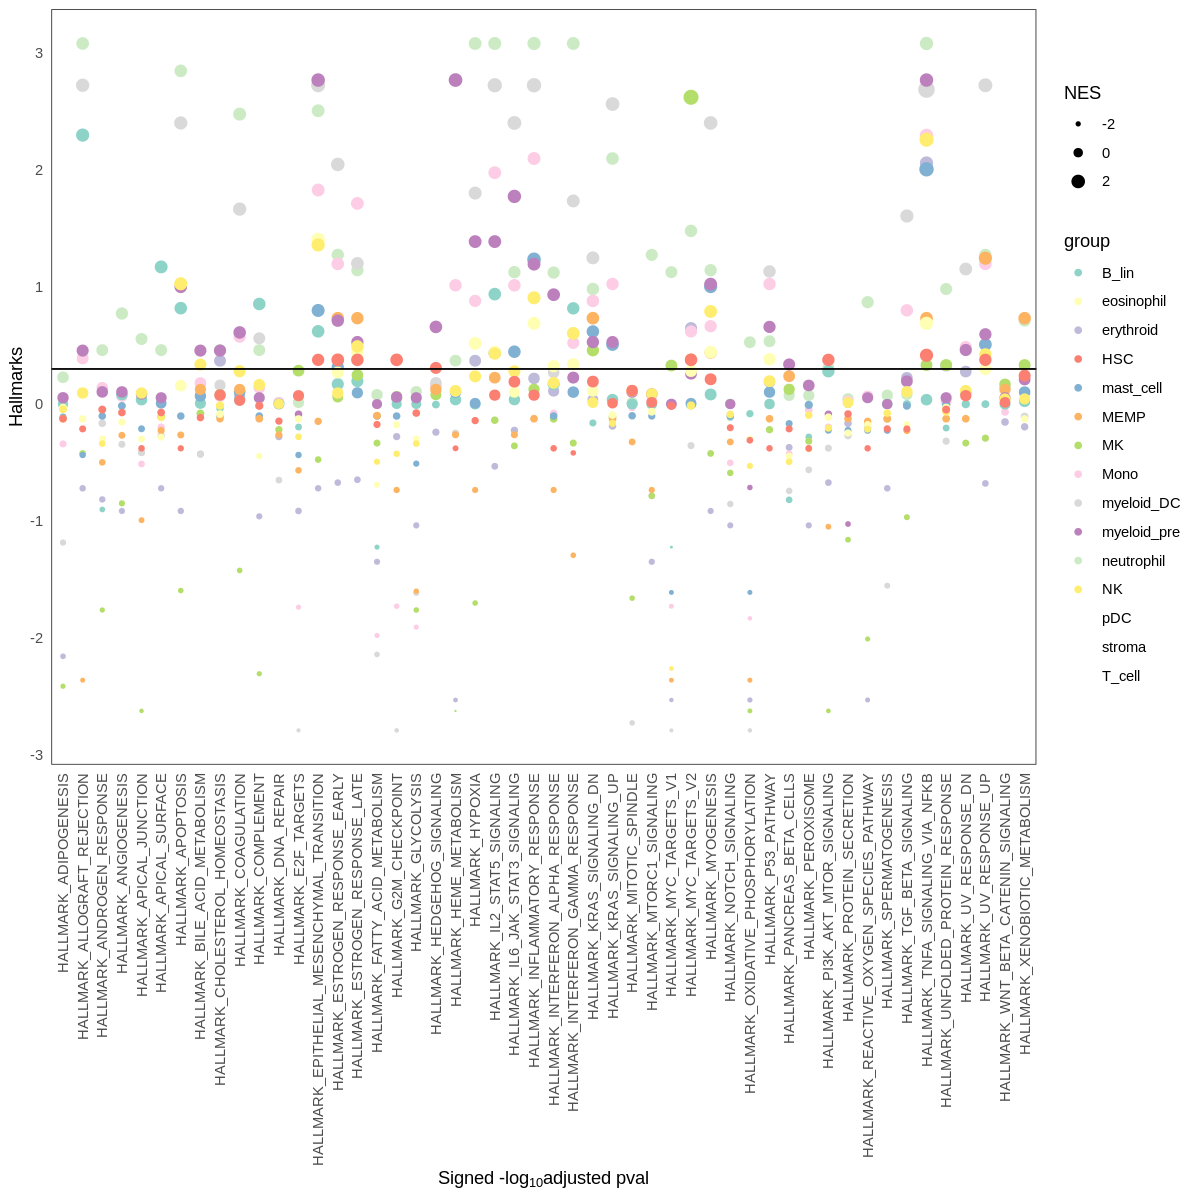

In [28]:
options(repr.plot.width=10, repr.plot.height=10)

ggplot(m1_res, aes(x = pathway, y = -log10(padj)*sign(NES), col = group, size = NES)) + 
		geom_point() + 
		labs(x = expression(paste("Signed", " -log" ["10"], "adjusted pval")), y = "Hallmarks") +
		theme_bw() +
        geom_hline(yintercept=0.3) +
		scale_radius(range = c(0,4)) +
		theme(panel.grid.major = element_blank(), 
			panel.grid.minor = element_blank(), 
			panel.background = element_blank(), 
			axis.line = element_blank(), 
			axis.ticks = element_blank(),
            axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
	scale_color_brewer(palette = "Set3")

In [92]:
test<-filter(m1_res, pathway %in% c("HALLMARK_TNFA_SIGNALING_VIA_NFKB", "HALLMARK_G2M_CHECKPOINT", "HALLMARK_DNA_REPAIR", "HALLMARK_P53_PATHWAY"))

In [93]:
test$group <- factor(test$group, levels = c("HSC", "MEMP", 
                                            "myeloid_pre", "myeloid_DC", "Mono",
                                            "erythroid", "MK",  "neutrophil",
                                            "B_lin", 
                                      "pDC", "eosinophil", "mast_cell",
                                       "T_cell", "NK", "stroma"))

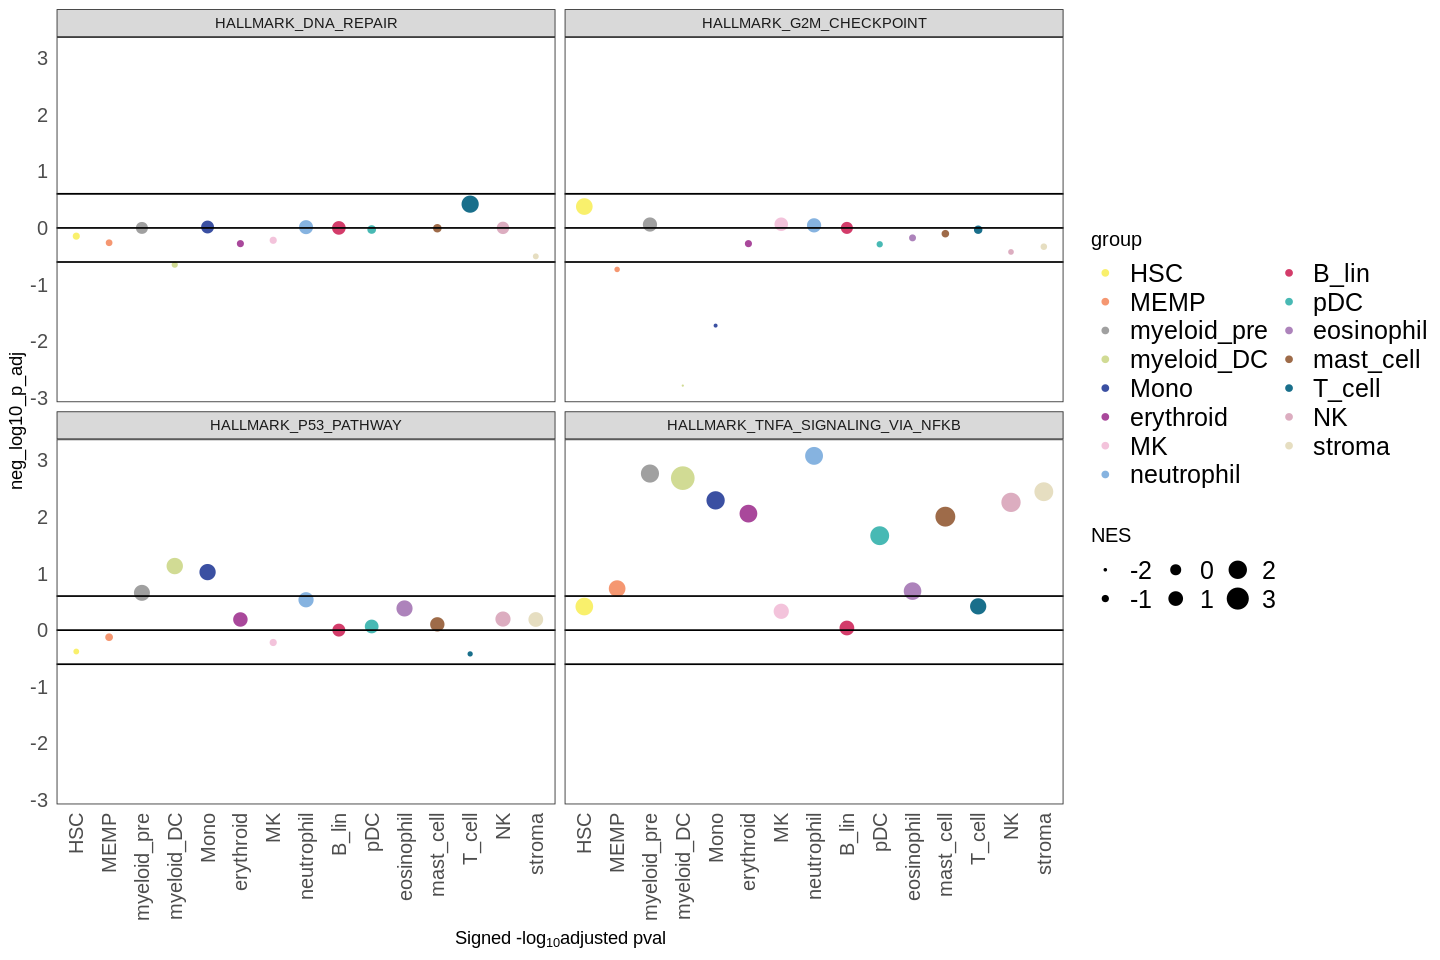

In [272]:
options(repr.plot.width=12, repr.plot.height=8)

ggplot(test, aes(x = group, y = -log10(padj)*sign(NES), colour = group, size = NES)) + 
		geom_point() + 
		labs(x = expression(paste("Signed", " -log" ["10"], "adjusted pval")), y = "neg_log10_p_adj") +
		theme_bw() +
        facet_wrap(~ pathway, ncol = 2) +

       scale_colour_manual(values=c("#f9f06c", "#f59771", "#a0a0a0", "#d1db94", "#3b50a2", "#a9489b", "#f3c3db",
                                   "#86b3e0", "#d33c6a", "#48b9b4", '#AD83BB', '#9E6B49', '#196F8B', '#DCADC0', '#e6dec1')) +
		scale_radius(range = c(0,6)) +
		geom_hline(yintercept = 0) +
		geom_hline(yintercept = -log10(0.25)) +
		geom_hline(yintercept = -log10(0.25)*-1) +
		theme(panel.grid.major = element_blank(), 
			panel.grid.minor = element_blank(), 
			panel.background = element_blank(), 
			axis.line = element_blank(), 
			axis.ticks = element_blank(),
            axis.text.x = element_text(size = 12, angle = 90, vjust = 0.5, hjust=1),
            axis.text.y = element_text(size = 12),
            legend.title = element_text(size = 12),
            legend.text = element_text(size = 15),
             legend.direction = "horizontal") +
             guides(colour=guide_legend(ncol=2, title.position = "top"),
                   size=guide_legend(title.position = "top"))

setwd('/home/jovyan/data/bone_marrow/figures')

ggsave("GSEA_pathway.pdf", plot = last_plot(), device = NULL, path = NULL,
  scale = 1, dpi = 300,  width = 10,  height = 8)



***TNF production - figure 5F***



In [ ]:
#First export the mean expression levels from scanpy/python - far quicker than doing in R!

#downs = bm[bm.obs.Status.isin(['Downs']),:]
#healthy = bm[bm.obs.Status.isin(['Healthy']),:]
#ex_matrix = bm.to_df()
#os.chdir('/home/jovyan/data/bone_marrow/data')
#pd.DataFrame(ex_matrix[['TNF']]).merge(bm.obs[['Status', 'clusters_jan']], left_index = True, right_index = True)
#pd.DataFrame(a.groupby(['clusters_jan', 'Status'])['TNF'].mean()).to_csv('TNF_levels.csv')

In [124]:
setwd('/home/jovyan/data/bone_marrow/data')
tnf<-read.csv('TNF_levels.csv')

In [126]:
tnf <- tnf %>% filter(!clusters_jan %in% c("basophil", "lymphoid_pre"))

In [127]:
tnf$clusters_jan <- factor(tnf$clusters_jan, levels = rev(c("HSC", "MEMP", 
                                            "myeloid_pre", "myeloid_DC", "Mono",
                                            "erythroid", "MK",  "neutrophil",
                                            "B_lin", 
                                      "pDC", "eosinophil", "mast_cell",
                                       "T_cell", "NK", "stroma")))

In [134]:
tnf$Status <- factor(tnf$Status, levels = c("Healthy", "Downs"))

Saving 6.67 x 6.67 in image



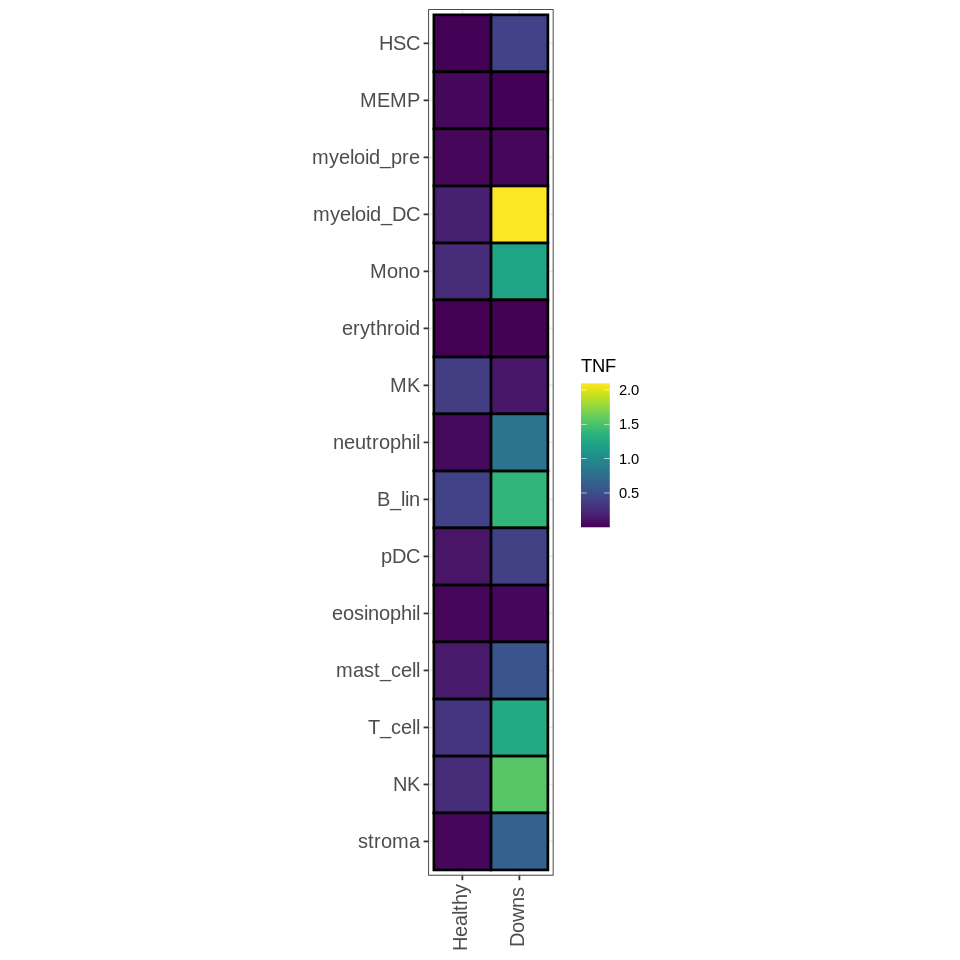

In [136]:
library(viridis)

options(repr.plot.width=10, repr.plot.height=10)


ggplot(tnf, aes(x = Status, y = clusters_jan, fill=TNF)) + 
  geom_tile(colour = 'black', size = 0.75) + 
  scale_fill_viridis() +
  coord_fixed() +
#scale_color_manual(values = c("black")) + 
  theme_bw() + theme(axis.text.x=element_text(size=12, angle=90, vjust=0.3),
                     axis.text.y=element_text(size=12),
                     axis.title.x = element_blank(),
                     axis.title.y = element_blank(),
                     plot.title=element_text(size=11))

setwd('/home/jovyan/data/bone_marrow/figures')
ggsave("TNF_expression.pdf", plot = last_plot(), device = NULL, path = NULL,
  scale = 1, dpi = 300)



***Chromosome 21 DEGs plot***



In [318]:
library(dplyr)
library(ggplot2)
library(reshape2)
library(RColorBrewer)

setwd('/home/jovyan/data/bone_marrow/data')
a<-read.csv("downs_vs_healthy_DEGs.csv", header= TRUE, row.names = 1)
a$V3<-NULL
a$V4<-NULL
a$X<-NULL

a<-subset(a, cluster == "Downs")
a<-subset(a, V2 == "chr21")

b<-table(a$celltype, droplevels(a$gene))
b<-b[,order(colSums(b))]

d<-melt(b)
colnames(d)<-c("celltype", "gene", "expression")
d$expression<-as.factor(d$expression)

d$celltype <- factor(d$celltype, levels = rev(c("HSC", "MEMP", 
                                            "myeloid_pre", "myeloid_DC", "Mono",
                                            "erythroid", "MK",  "neutrophil",
                                            "B_lin", 
                                      "pDC", "eosinophil", "mast_cell",
                                       "T_cell", "NK", "stroma")))

d$gene <- factor(d$gene, levels = rev(c(colnames(b))))


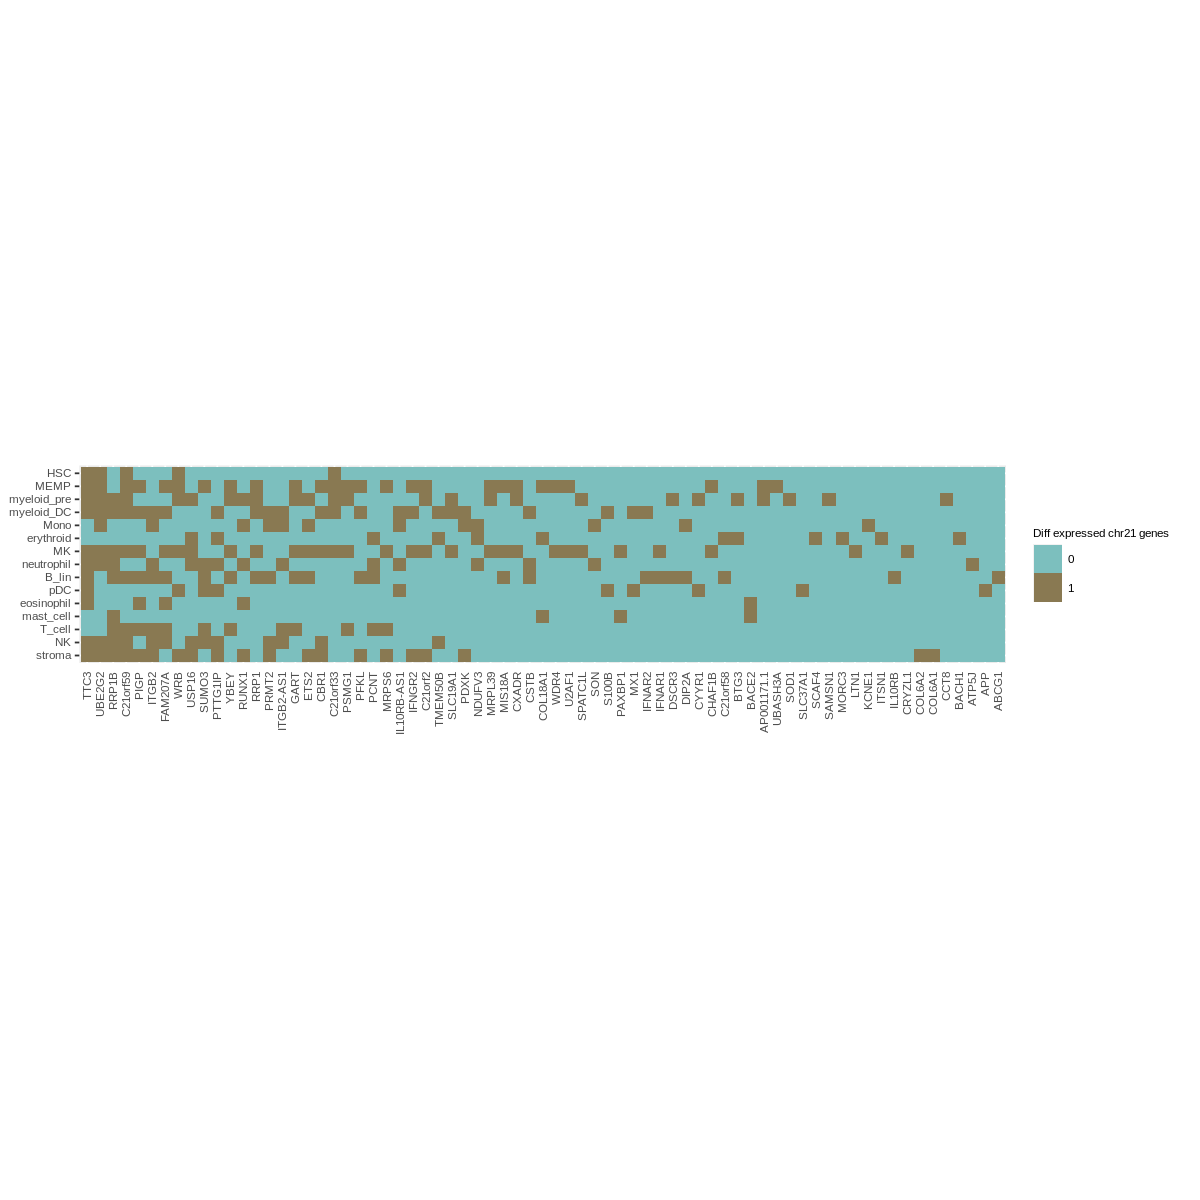

In [320]:
options(repr.plot.width=10, repr.plot.height=10)

ggplot(d, aes(gene, celltype, fill= expression)) + 
   geom_tile()+
scale_fill_manual(values = c('#7cbfbe', '#897952'))+
  coord_fixed()+
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
  theme(axis.title.x=element_blank(),
        axis.title.y=element_blank(),
        axis.ticks.x=element_blank(),
        axis.text.x=element_text(size=7, angle = 90,  vjust = 0.5, hjust=1),
       axis.text=element_text(size=7),
       legend.text = element_text(size = 7), 
        legend.title = element_text(size = 7))+
labs(fill='Diff expressed chr21 genes')